In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import MinMaxScaler


In [2]:
df = pd.read_csv('processed_data_Ideaspice.csv')

In [3]:
df.head()

,Unnamed: 0,Gender,MaritalStatus,Travelling,Vertical,Education,Role,OverTime,Age,Turnover,...,Work Experience,SalaryHike,Last Rating,TrainingTimesLastYear,Work&Life,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,DistanceFromHome
0,0,0,2,2,2,3,7,1,40,0,...,1,23,4,1,3,1,1,1,1,2
1,1,1,1,1,2,2,7,0,46,0,...,9,18,3,2,3,8,7,7,7,23
2,2,0,2,2,1,3,5,1,49,0,...,5,14,3,2,4,5,5,0,5,13
3,3,1,1,2,1,1,0,0,29,0,...,1,19,3,3,2,1,1,1,1,13
4,4,0,1,2,1,3,5,0,54,0,...,2,13,3,3,3,2,2,0,1,1


In [4]:
df.drop(columns='Unnamed: 0',inplace=True)

In [5]:
feature_scale = [feature for feature in df.columns if feature not in ['Turnover']]

In [6]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
scale.fit(df[feature_scale])

MinMaxScaler()

In [7]:
# transform 
df = pd.concat([df[['Turnover']].reset_index(drop=True),
                    pd.DataFrame(scale.transform(df[feature_scale]), columns=feature_scale)],
                    axis=1)

In [8]:
df.head()

,Turnover,Gender,MaritalStatus,Travelling,Vertical,Education,Role,OverTime,Age,Qualifications,...,Work Experience,SalaryHike,Last Rating,TrainingTimesLastYear,Work&Life,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,DistanceFromHome
0,0,0.0,1.0,1.0,1.0,0.6,0.875,1.0,0.536585,0.50,...,0.111111,0.857143,1.0,0.166667,0.666667,0.111111,0.111111,0.111111,0.111111,0.035714
1,0,1.0,0.5,0.5,1.0,0.4,0.875,0.0,0.682927,0.75,...,1.000000,0.500000,0.0,0.333333,0.666667,0.888889,0.777778,0.777778,0.777778,0.785714
2,0,0.0,1.0,1.0,0.5,0.6,0.625,1.0,0.756098,0.50,...,0.555556,0.214286,0.0,0.333333,1.000000,0.555556,0.555556,0.000000,0.555556,0.428571
3,0,1.0,0.5,1.0,0.5,0.2,0.000,0.0,0.268293,1.00,...,0.111111,0.571429,0.0,0.500000,0.333333,0.111111,0.111111,0.111111,0.111111,0.428571
4,0,0.0,0.5,1.0,0.5,0.6,0.625,0.0,0.878049,0.50,...,0.222222,0.142857,0.0,0.500000,0.666667,0.222222,0.222222,0.000000,0.111111,0.000000


In [9]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt 
import seaborn as sns 

In [10]:
X = df.drop(columns='Turnover')

In [11]:
Y = df['Turnover']

In [12]:
X.head()

,Gender,MaritalStatus,Travelling,Vertical,Education,Role,OverTime,Age,Qualifications,Satisfaction,...,Work Experience,SalaryHike,Last Rating,TrainingTimesLastYear,Work&Life,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,DistanceFromHome
0,0.0,1.0,1.0,1.0,0.6,0.875,1.0,0.536585,0.50,1.0,...,0.111111,0.857143,1.0,0.166667,0.666667,0.111111,0.111111,0.111111,0.111111,0.035714
1,1.0,0.5,0.5,1.0,0.4,0.875,0.0,0.682927,0.75,1.0,...,1.000000,0.500000,0.0,0.333333,0.666667,0.888889,0.777778,0.777778,0.777778,0.785714
2,0.0,1.0,1.0,0.5,0.6,0.625,1.0,0.756098,0.50,1.0,...,0.555556,0.214286,0.0,0.333333,1.000000,0.555556,0.555556,0.000000,0.555556,0.428571
3,1.0,0.5,1.0,0.5,0.2,0.000,0.0,0.268293,1.00,1.0,...,0.111111,0.571429,0.0,0.500000,0.333333,0.111111,0.111111,0.111111,0.111111,0.428571
4,0.0,0.5,1.0,0.5,0.6,0.625,0.0,0.878049,0.50,0.0,...,0.222222,0.142857,0.0,0.500000,0.666667,0.222222,0.222222,0.000000,0.111111,0.000000


<Axes: >

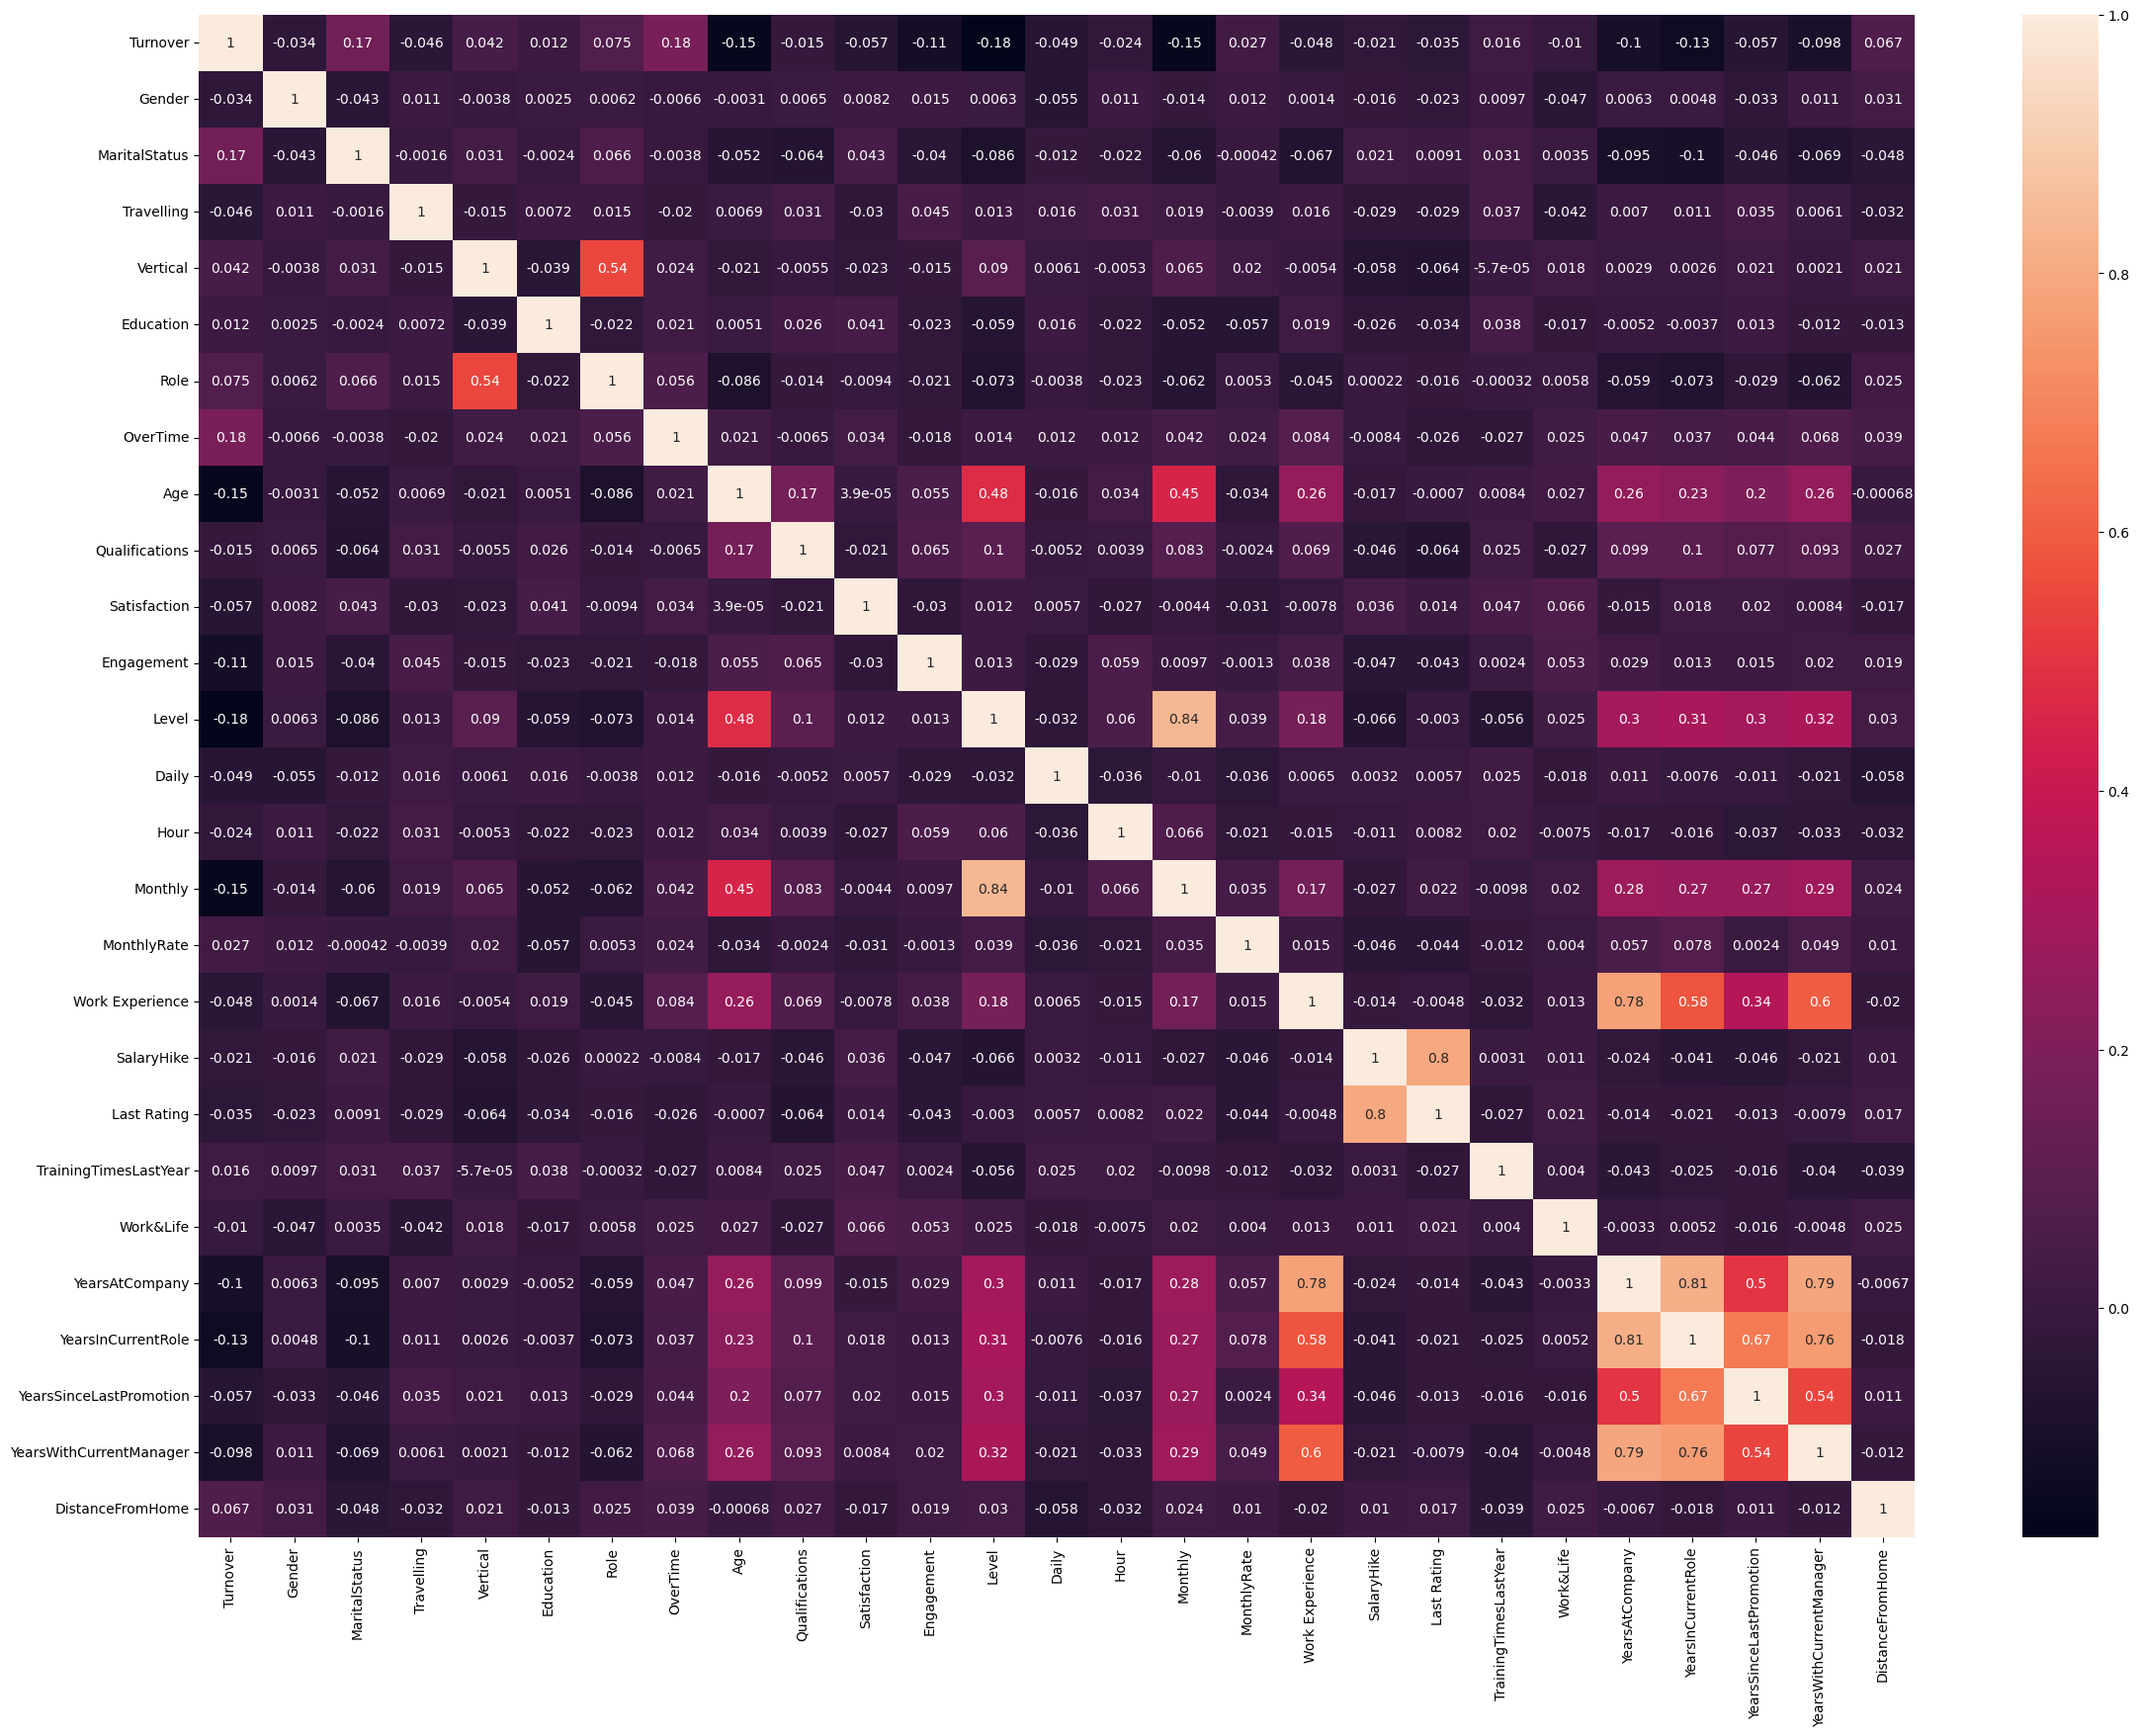

In [14]:
plt.figure(figsize = (28,20))
sns.heatmap(df.corr(), annot=True)

In [15]:


feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X,Y)


SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [16]:
feature_sel_model.get_support()

array([ True,  True,  True, False, False,  True,  True,  True, False,
        True,  True,  True,  True, False,  True, False, False, False,
       False, False, False, False,  True, False, False,  True])

In [17]:

# this is how we can make a list of the selected features
selected_feat = X.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))


total features: 26
selected features: 13


In [18]:
selected_feat

Index(['Gender', 'MaritalStatus', 'Travelling', 'Role', 'OverTime', 'Age',
       'Satisfaction', 'Engagement', 'Level', 'Daily', 'Monthly',
       'YearsInCurrentRole', 'DistanceFromHome'],
      dtype='object')

In [19]:
X_train=df[selected_feat]